In [124]:
#导入相关包
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
#设置sns样式
sns.set(style='white',context='notebook',palette='muted')
import matplotlib.pyplot as plt
#导入数据
train=pd.read_csv('./original_data/train.csv')
test=pd.read_csv('./original_data/test.csv')

In [125]:
#分别查看实验数据集和预测数据集数据
print('实验数据大小:',train.shape)
print('预测数据大小:',test.shape)
实验数据大小: (891, 12)
预测数据大小: (418, 11)
print('train data--->>')
train.head()

实验数据大小: (891, 12)
预测数据大小: (418, 11)
train data--->>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
#将实验数据和预测数据合并
full=train.append(test,ignore_index=True)

#这里只查看了数值型的数据，对于字符型的数据，例如name并没有展示
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [127]:
train.head() #打印训练训练集的数据进行观察

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


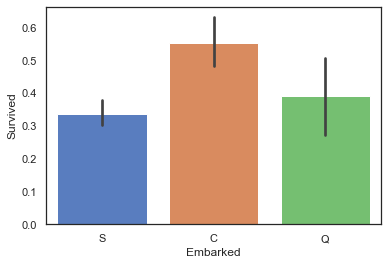

In [128]:
sns.barplot(data=train,x='Embarked',y='Survived') #查看登船口与生存率的关系

In [129]:
full.info()#查看所有文件的信息，有没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


可以看出，这里的Age,和Cabin的缺失信息比较多，而Survived缺失的部分是我们需要求的。

In [130]:
#计算不同类型embarked的乘客，其生存率为多少
print('Embarked为"S"的乘客，其生存率为%.2f'%full['Survived'][full['Embarked']=='S'].value_counts(normalize=True)[1])
#'C','Q'代码类同'S'，这里不赘述啦
print('Embarked为"C"的乘客，其生存率为%.2f'%full['Survived'][full['Embarked']=='C'].value_counts(normalize=True)[1])
print('Embarked为"Q"的乘客，其生存率为%.2f'%full['Survived'][full['Embarked']=='Q'].value_counts(normalize=True)[1])

Embarked为"S"的乘客，其生存率为0.34
Embarked为"C"的乘客，其生存率为0.55
Embarked为"Q"的乘客，其生存率为0.39


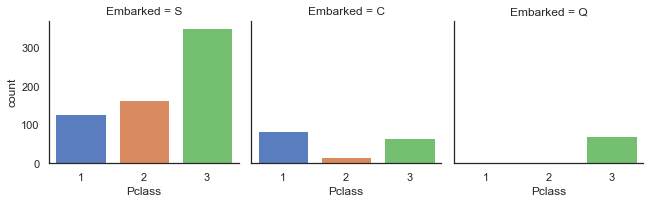

In [131]:
#法国登船乘客生存率较高原因可能与其头等舱乘客比例较高有关
sns.factorplot('Pclass',col='Embarked',data=train,kind='count',size=3)

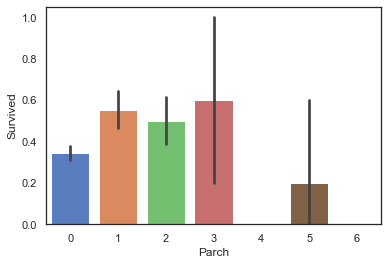

In [132]:
#Parch与Survived：当乘客同行的父母及子女数量适中时，生存率较高
sns.barplot(data=train,x='Parch',y='Survived')

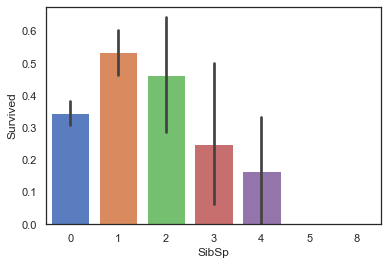

In [133]:
#SibSp与Survived：当乘客同行的同辈数量适中时生存率较高
sns.barplot(data=train,x='SibSp',y='Survived')

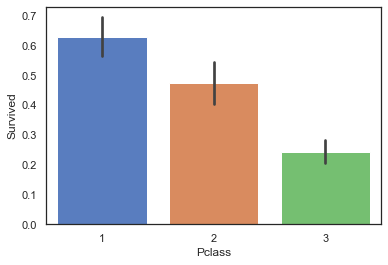

In [134]:
#Pclass与Survived：乘客客舱等级越高，生存率越高
sns.barplot(data=train,x='Pclass',y='Survived')

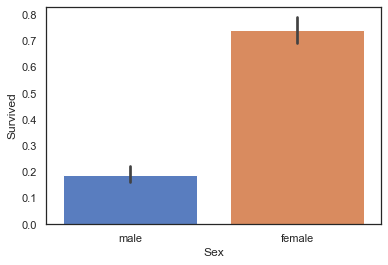

In [135]:
 #Sex与Survived：女性的生存率远高于男性
sns.barplot(data=train,x='Sex',y='Survived')    

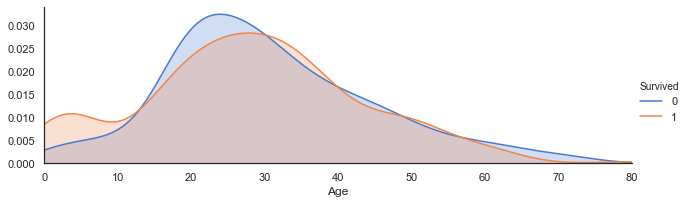

In [136]:
#Age与Survived：当乘客年龄段在0-10岁期间时生存率会较高
#创建坐标轴
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
#作图，选择图形类型
ageFacet.map(sns.kdeplot,'Age',shade=True)
#其他信息：坐标轴范围、标签等
ageFacet.set(xlim=(0,train['Age'].max()))
ageFacet.add_legend()

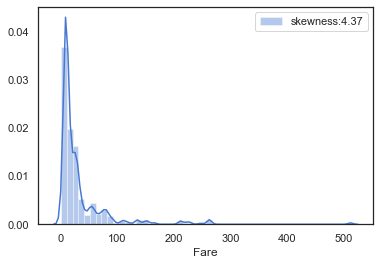

In [137]:
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')  #在最合适的位置添加一个图例子

# 数据预处理

- 数据预处理主要包括以下四个方面内容：
- 数据清洗（缺失值以及异常值的处理）
- 特征工程（基于对现有数据特征的理解构造的新特征，以挖掘数据的更多特点）
- 同组识别（找出具有明显同组效应且违背整体规律的数据，对其数据进行修正）
- 筛选子集（对数据进行降维，选择子集）

In [138]:
#Cabin/Embarked/Fare/Age这些都是要填充的

In [139]:
#对Cabin缺失值进行处理，利用U（Unknown）填充缺失值
full['Cabin']=full['Cabin'].fillna('U')
full['Cabin'].head()


0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [140]:
#对Embarked缺失值进行处理，查看缺失值情况
full[full['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [141]:
#查看在各个登船口登船的可能性
full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [142]:
full['Embarked']=full['Embarked'].fillna('S')

In [143]:
full[full['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [144]:
#查看缺失数据情况，该乘客乘坐3等舱，登船港口为法国，舱位未知
full[full['Fare'].isnull()]  #从这里可以看出isnull返回的是一个行值

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


In [145]:
full[full['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


In [146]:
#利用3等舱，登船港口为法国，舱位未知旅客的平均票价来填充缺失值。
full['Fare']=full['Fare'].fillna(full[(full['Pclass']==3)&(full['Embarked']=='C')&(full['Cabin']=='U')]['Fare'].mean())

# 特征工程

- Name中的头衔信息-Title
- 旅客姓名数据中包含头衔信息，不同头衔也可以反映旅客的身份，而不同身份的旅客其生存率有可能会出现较大差异。
- 因此我们通过Name特征提取旅客头衔Title信息，并分析Title与Survived之间的关系。

In [147]:
#构造新特征Title
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
#查看title数据分布
full['Title'].value_counts()


Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Lady              1
Jonkheer          1
Don               1
Mme               1
Sir               1
the Countess      1
Dona              1
Capt              1
Name: Title, dtype: int64

In [148]:
#将title信息进行整合
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'
print(TitleDict)
full['Title']=full['Title'].map(TitleDict)
full['Title'].value_counts()

{'Mr': 'Mr', 'Mlle': 'Miss', 'Miss': 'Miss', 'Master': 'Master', 'Jonkheer': 'Master', 'Mme': 'Mrs', 'Ms': 'Mrs', 'Mrs': 'Mrs', 'Don': 'Royalty', 'Sir': 'Royalty', 'the Countess': 'Royalty', 'Dona': 'Royalty', 'Lady': 'Royalty', 'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Dr': 'Officer', 'Rev': 'Officer'}


Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

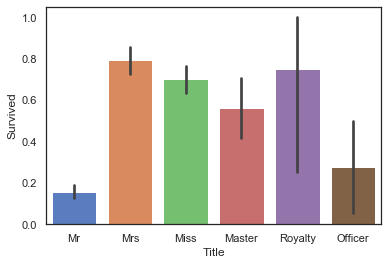

In [149]:
#可视化分析Title与Survived之间关系
sns.barplot(data=full,x='Title',y='Survived')

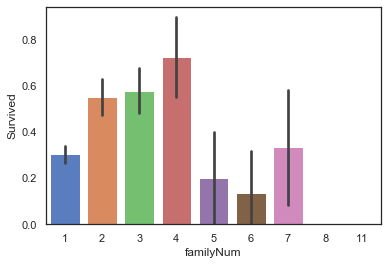

In [150]:
full['familyNum']=full['Parch']+full['SibSp']+1
#查看familyNum与Survived
sns.barplot(data=full,x='familyNum',y='Survived')

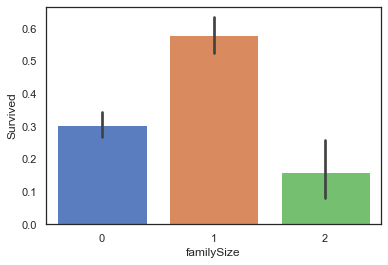

In [151]:
#家庭成员人数在2-4人时，乘客的生存率较高，当没有家庭成员同行或家庭成员人数过多时生存率较低。
def familysize(familyNum):
    if familyNum==1:
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else:
        return 2

full['familySize']=full['familyNum'].map(familysize)
full['familySize'].value_counts()

#查看familySize与Survived
sns.barplot(data=full,x='familySize',y='Survived')

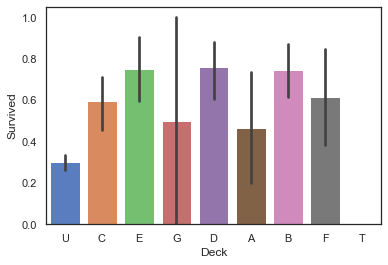

In [152]:
#提取Cabin字段首字母
full['Deck']=full['Cabin'].map(lambda x:x[0])
#查看不同Deck类型乘客的生存率
sns.barplot(data=full,x='Deck',y='Survived')

In [153]:
#同一票号的乘客数量可能不同，可能也与乘客生存率有关系。
#提取各票号的乘客数量
TickCountDict={}
TickCountDict=full['Ticket'].value_counts()
TickCountDict.head() #这里只显示了字典的前五个

CA. 2343        11
1601             8
CA 2144          8
S.O.C. 14879     7
347077           7
Name: Ticket, dtype: int64

In [154]:
print(TickCountDict)  

CA. 2343        11
1601             8
CA 2144          8
S.O.C. 14879     7
347077           7
                ..
35852            1
349242           1
231945           1
368402           1
330911           1
Name: Ticket, Length: 929, dtype: int64


In [155]:
full['TickCot']=full['Ticket'].map(TickCountDict)
full['TickCot'].head()

0    1
1    2
2    1
3    2
4    1
Name: TickCot, dtype: int64

In [156]:
print(full['TickCot'])  #这里

0       1
1       2
2       1
3       2
4       1
       ..
1304    1
1305    3
1306    1
1307    1
1308    3
Name: TickCot, Length: 1309, dtype: int64


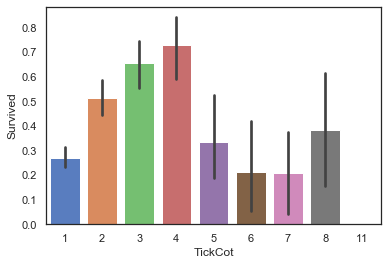

In [157]:
sns.barplot(data=full,x='TickCot',y='Survived')

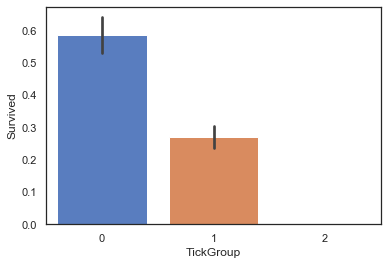

In [158]:
#按照TickCot大小，将TickGroup分为三类。
def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else :
        return 2
#得到各位乘客TickGroup的类别
full['TickGroup']=full['TickCot'].map(TickCountGroup)
#查看TickGroup与Survived之间关系
sns.barplot(data=full,x='TickGroup',y='Survived')

In [159]:
#查看缺失值情况
full[full['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCot,TickGroup
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,U,Q,Mr,1,0,U,1,1
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,U,S,Mr,1,0,U,1,1
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,U,C,Mrs,1,0,U,1,1
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,U,C,Mr,1,0,U,1,1
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,U,Q,Miss,1,0,U,1,1


In [160]:
#筛选数据集
AgePre=full[['Age','Parch','Pclass','SibSp','Title','familyNum','TickCot']]
print(AgePre)

#进行one-hot编码
AgePre=pd.get_dummies(AgePre)#pd.get_dummies会对非数值型的值进行one-hot编码，所以这一步实际上只操作了'Title'
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')#给输出的列添加前缀，如prefix=“A”,避免将前面的
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')

       Age  Parch  Pclass  SibSp    Title  familyNum  TickCot
0     22.0      0       3      1       Mr          2        1
1     38.0      0       1      1      Mrs          2        2
2     26.0      0       3      0     Miss          1        1
3     35.0      0       1      1      Mrs          2        2
4     35.0      0       3      0       Mr          1        1
...    ...    ...     ...    ...      ...        ...      ...
1304   NaN      0       3      0       Mr          1        1
1305  39.0      0       1      0  Royalty          1        3
1306  38.5      0       3      0       Mr          1        1
1307   NaN      0       3      0       Mr          1        1
1308   NaN      1       3      1   Master          3        3

[1309 rows x 7 columns]


In [161]:
AgePre
AgePre.to_csv('./Result.csv')

PermissionError: [Errno 13] Permission denied: './Result.csv'

In [162]:
SibAge

,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1304,1,0,0,0,0,0,0
1305,1,0,0,0,0,0,0
1306,1,0,0,0,0,0,0
1307,1,0,0,0,0,0,0


In [163]:
AgeCorrDf=pd.DataFrame()
AgeCorrDf=AgePre.corr()
AgeCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCot         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [164]:
AgeCorrDf

,Age,Parch,Pclass,SibSp,familyNum,TickCot,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
Age,1.000000,-0.150917,-0.408106,-0.243699,-0.240229,-0.185284,-0.385380,-0.282977,0.183965,0.215091,0.166771,0.057337
Parch,-0.150917,1.000000,0.018322,0.373587,0.792296,0.647029,0.249930,0.066473,-0.304780,0.213491,-0.032631,-0.027555
Pclass,-0.408106,0.018322,1.000000,0.060832,0.050027,-0.078554,0.088964,0.024487,0.121492,-0.179945,-0.137341,-0.095738
SibSp,-0.243699,0.373587,0.060832,1.000000,0.861952,0.679444,0.324913,0.077564,-0.243104,0.061643,-0.013813,-0.005879
familyNum,-0.240229,0.792296,0.050027,0.861952,1.000000,0.800556,0.350319,0.087350,-0.326487,0.157233,-0.026921,-0.018928
TickCot,-0.185284,0.647029,-0.078554,0.679444,0.800556,1.000000,0.300587,0.112016,-0.286860,0.105835,-0.037051,-0.003536
Title_Master,-0.385380,0.249930,0.088964,0.324913,0.350319,0.300587,1.000000,-0.111542,-0.261121,-0.094692,-0.029820,-0.013807
Title_Miss,-0.282977,0.066473,0.024487,0.077564,0.087350,0.112016,-0.111542,1.000000,-0.585809,-0.212435,-0.066899,-0.030976
Title_Mr,0.183965,-0.304780,0.121492,-0.243104,-0.326487,-0.286860,-0.261121,-0.585809,1.000000,-0.497310,-0.156611,-0.072514
Title_Mrs,0.215091,0.213491,-0.179945,0.061643,0.157233,0.105835,-0.094692,-0.212435,-0.497310,1.000000,-0.056793,-0.026296


In [165]:
#拼接数据
AgePre=pd.concat([AgePre,ParAge,SibAge,PclAge],axis=1)
AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCot,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,3,1,2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,38.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,26.0,0,3,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,35.0,0,3,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [166]:
#拆分实验集和预测集
AgeKnown=AgePre[AgePre['Age'].notnull()] #通过判断AgePre中Age关键字是不是缺失的，来拆分测试集和训练集
AgeUnKnown=AgePre[AgePre['Age'].isnull()]

#生成实验数据的特征和标签
AgeKnown_X=AgeKnown.drop(['Age'],axis=1) #将A关键字所在的一列删除
print(AgeKnown_X)
AgeKnown_y=AgeKnown['Age']
#生成预测数据的特征
AgeUnKnown_X=AgeUnKnown.drop(['Age'],axis=1)

#利用随机森林构建模型
from sklearn.ensemble import RandomForestRegressor
#
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_y)

      Parch  Pclass  SibSp  familyNum  TickCot  Title_Master  Title_Miss  \
0         0       3      1          2        1             0           0   
1         0       1      1          2        2             0           0   
2         0       3      0          1        1             0           1   
3         0       1      1          2        2             0           0   
4         0       3      0          1        1             0           0   
...     ...     ...    ...        ...      ...           ...         ...   
1300      1       3      1          3        3             0           1   
1302      0       1      1          2        3             0           0   
1303      0       3      0          1        1             0           1   
1305      0       1      0          1        3             0           0   
1306      0       3      0          1        1             0           0   

      Title_Mr  Title_Mrs  Title_Officer  ...  SibSp_0  SibSp_1  SibSp_2  \
0          

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### RandomForestRegressor的一些说明，与参数的意义，填补Age的缺失值时，我们使用了随机森林
#### 随机森林是一个集成工具，它使用观测数据的子集和变量的子集来建立一个决策树。 它建立多个这样的决策树，然后将他们合并在一起以获得更准确和稳定的预测。 这样做最直接的事实是，在这一组独立的预测结果中，用投票方式得到一个最高投票结果，这个比单独使用最好模型预测的结果要好。
- random_state：
- 此参数让结果容易复现。 一个确定的随机值将会产生相同的结果，在参数和训练数据不变的情况下。 我曾亲自尝试过将不同的随机状态的最优参数模型集成，有时候这种方法比单独的随机状态更好。
- n_estimators：
- 在利用最大投票数或平均值来预测之前，你想要建立子树的数量。 较多的子树可以让模型有更好的性能，但同时让你的代码变慢。 你应该选择尽可能高的值，只要你的处理器能够承受的住，因为这使你的预测更好更稳定。
- n_jobs：
- 这个参数告诉引擎有多少处理器是它可以使用。 “-1”意味着没有限制，而“1”值意味着它只能使用一个处理器。 下面是一个用Python做的简单实验用来检查这个指标：
- oob_score：
- 这是一个随机森林交叉验证方法。 它和留一验证方法非常相似，但这快很多。 这种方法只是简单的标记在每颗子树中用的观察数据。 然后对每一个观察样本找出一个最大投票得分，是由那些没有使用该观察样本进行训练的子树投票得到。
- 下面函数中使用了所有这些参数的一个例子：
- model = RandomForestRegressor(n_estimator = 100, oob_score = TRUE, n_jobs = -1,random_state =50,max_features = "auto",min_samples_leaf = 50)
- model.fit(x, y)

In [167]:
#模型得分
rfr.score(AgeKnown_X,AgeKnown_y)
#预测年龄
AgeUnKnown_y=rfr.predict(AgeUnKnown_X)
#填充预测数据
full.loc[full['Age'].isnull(),['Age']]=AgeUnKnown_y
full.info()  #此时已无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickCot      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

### 同组识别
- 虽然通过分析数据已有特征与标签的关系可以构建有效的预测模型，但是部分具有明显共同特征的用户可能与整体模型逻辑并不一致。如果将这部分具有同组效应的用户识别出来并对其数据加以修正，就可以有效提高模型的准确率。在Titancic案例中，我们主要探究相同姓氏的乘客是否存在明显的同组效应。
- 提取两部分数据，分别查看其“姓氏”是否存在同组效应（因为性别和年龄与乘客生存率关系最为密切，因此用这两个特征作为分类条件）：
- 12岁以上男性：找出男性中同姓氏均获救的部分；
- 女性以及年龄在12岁以下儿童：找出女性及儿童中同姓氏均遇难的部分。

In [173]:
#提取乘客的姓氏及相应的乘客数
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
print(full['Surname'])
SurNameDict={}
SurNameDict=full['Surname'].value_counts()
full['SurnameNum']=full['Surname'].map(SurNameDict)

#将数据分为两组
MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]

0              Braund
1             Cumings
2           Heikkinen
3            Futrelle
4               Allen
            ...      
1304          Spector
1305    Oliva y Ocana
1306          Saether
1307             Ware
1308            Peter
Name: Surname, Length: 1309, dtype: object


In [169]:
full['SurnameNum']

0       2
1       2
2       1
3       2
4       2
       ..
1304    1
1305    1
1306    1
1307    4
1308    3
Name: SurnameNum, Length: 1309, dtype: int64

In [178]:
#分析男性同组效应
'''
groupby就是按xx分组, 它也确实是用来实现这样功能的. 比如, 将一个数据集按A进行分组, 效果是这样
'''
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
#MSurNamDf.to_csv('./msurnamdf')  #返回的是 姓名：存活个数的均值 的数值对  Cardeza,1.0  Carter,0.5   Cavendish,0.0
MSurNamDf.value_counts()   #统计各种值出现的概率

0.0    89
1.0    19
0.5     3
Name: Survived, dtype: int64

In [179]:
'''
大多数同姓氏的男性存在“同生共死”的特点，因此利用该同组效应，
我们对生存率为1的姓氏里的男性数据进行修正，提升其预测为“可以幸存”的概率。
'''
#获得生存率为1的姓氏
MSurNamDict={}
MSurNamDict=MSurNamDf[MSurNamDf.values==1].index
MSurNamDict

Index(['Beane', 'Beckwith', 'Bishop', 'Cardeza', 'Chambers', 'Dick',
       'Duff Gordon', 'Frauenthal', 'Frolicher-Stehli', 'Goldenberg',
       'Greenfield', 'Harder', 'Hoyt', 'Kimball', 'Lindqvist', 'McCoy',
       'Nakid', 'Persson', 'Taylor'],
      dtype='object', name='Surname')

In [180]:
#分析女性及儿童同组效应
FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()


1.000000    115
0.000000     27
0.750000      2
0.333333      1
0.142857      1
Name: Survived, dtype: int64

In [181]:
#获得生存率为0的姓氏
FCSurNamDict={}
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict

Index(['Ahlin', 'Arnold-Franchi', 'Barbara', 'Boulos', 'Bourke', 'Caram',
       'Danbom', 'Ford', 'Goodwin', 'Ilmakangas', 'Johnston', 'Jussila',
       'Lahtinen', 'Lefebre', 'Lobb', 'Palsson', 'Panula', 'Rice', 'Robins',
       'Rosblom', 'Sage', 'Skoog', 'Strom', 'Turpin', 'Van Impe',
       'Vander Planke', 'Zabour'],
      dtype='object', name='Surname')

In [182]:
#对数据集中这些姓氏的男性数据进行修正：1、性别改为女；2、年龄改为5。
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Age']=5
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Sex']='female'

#对数据集中这些姓氏的女性及儿童的数据进行修正：1、性别改为男；2、年龄改为60。
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Age']=60
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Sex']='male'

## 筛选子集

In [208]:
#人工筛选
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
#查看各特征与标签的相关性
#corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.338481
TickGroup    -0.319278
Age          -0.059490
SibSp        -0.035322
familyNum     0.016639
TickCot       0.064962
Parch         0.081629
familySize    0.108631
Fare          0.257307
Survived      1.000000
Name: Survived, dtype: float64

### 用法：
- DataFrame.sort_values(by=‘##’,axis=0,ascending=True, inplace=False, na_position=‘last’)
- 参数
- by
- 指定列名(axis=0或’index’)或索引值(axis=1或’columns’)
- axis
- 若axis=0或’index’，则按照指定列中数据大小排序；若axis=1或’columns’，则按照指定索引中数据大小排序，默认axis=0
- ascending
- 是否按指定列的数组升序排列，默认为True，即升序排列 
- inplace
- 是否用排序后的数据集替换原来的数据，默认为False，即不替换
- na_position
- {‘first’,‘last’}，设定缺失值的显示位置

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

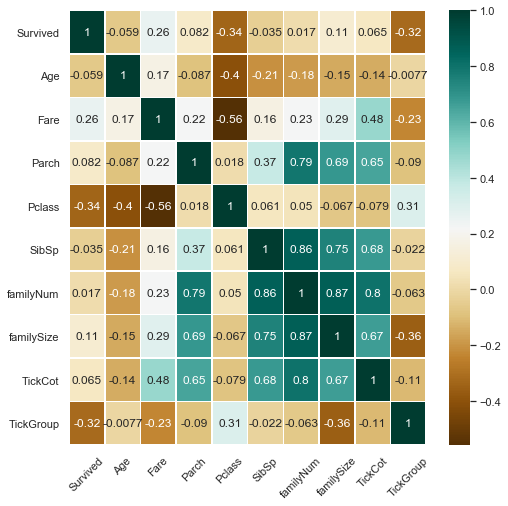

In [209]:
#热力图，查看Survived与其他特征间相关性大小
plt.figure(figsize=(8,8))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCot','TickGroup']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

In [210]:
fullSel

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,familyNum,familySize,Deck,TickCot,TickGroup
0,0.0,3,male,22.000000,1,0,7.2500,S,Mr,2,1,U,1,1
1,1.0,1,female,38.000000,1,0,71.2833,C,Mrs,2,1,C,2,0
2,1.0,3,female,26.000000,0,0,7.9250,S,Miss,1,0,U,1,1
3,1.0,1,female,35.000000,1,0,53.1000,S,Mrs,2,1,C,2,0
4,0.0,3,male,35.000000,0,0,8.0500,S,Mr,1,0,U,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,28.560523,0,0,8.0500,S,Mr,1,0,U,1,1
1305,NaN,1,female,39.000000,0,0,108.9000,C,Royalty,1,0,C,3,0
1306,NaN,3,male,38.500000,0,0,7.2500,S,Mr,1,0,U,1,1
1307,NaN,3,male,28.560523,0,0,8.0500,S,Mr,1,0,U,1,1


In [211]:
#从相关性热力图中我们看到了很多特征相关性很小，因此剔除。
fullSel=fullSel.drop(['familyNum','SibSp','TickCot','Parch'],axis=1)
fullSel

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,familySize,Deck,TickGroup
0,0.0,3,male,22.000000,7.2500,S,Mr,1,U,1
1,1.0,1,female,38.000000,71.2833,C,Mrs,1,C,0
2,1.0,3,female,26.000000,7.9250,S,Miss,0,U,1
3,1.0,1,female,35.000000,53.1000,S,Mrs,1,C,0
4,0.0,3,male,35.000000,8.0500,S,Mr,0,U,1
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,28.560523,8.0500,S,Mr,0,U,1
1305,NaN,1,female,39.000000,108.9000,C,Royalty,0,C,0
1306,NaN,3,male,38.500000,7.2500,S,Mr,0,U,1
1307,NaN,3,male,28.560523,8.0500,S,Mr,0,U,1


In [212]:
#one-hot编码
fullSel=pd.get_dummies(fullSel)
fullSel

,Survived,Pclass,Age,Fare,familySize,TickGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Royalty,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,22.000000,7.2500,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.000000,71.2833,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,3,26.000000,7.9250,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,35.000000,53.1000,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,3,35.000000,8.0500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,28.560523,8.0500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1305,NaN,1,39.000000,108.9000,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1306,NaN,3,38.500000,7.2500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1307,NaN,3,28.560523,8.0500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [213]:
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
TickGroupDf=pd.get_dummies(full['TickGroup'],prefix='TickGroup')
familySizeDf=pd.get_dummies(full['familySize'],prefix='familySize')

fullSel=pd.concat([fullSel,PclassDf,TickGroupDf,familySizeDf],axis=1)
fullSel

,Survived,Pclass,Age,Fare,familySize,TickGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_U,Pclass_1,Pclass_2,Pclass_3,TickGroup_0,TickGroup_1,TickGroup_2,familySize_0,familySize_1,familySize_2
0,0.0,3,22.000000,7.2500,1,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
1,1.0,1,38.000000,71.2833,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,1.0,3,26.000000,7.9250,0,1,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
3,1.0,1,35.000000,53.1000,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0.0,3,35.000000,8.0500,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,28.560523,8.0500,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1305,NaN,1,39.000000,108.9000,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1306,NaN,3,38.500000,7.2500,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1307,NaN,3,28.560523,8.0500,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0


### 之所以打印这么多的表格，无非就是想证明，pd.get_dummies的工作流程，同时我们也要注意，为什么Pclass这样的需在进行第二次指定的one-hot
### 而像Age 这种就不需要，究其原因，是因为Age里的数字是真实的有量值意义的，而Pclass的值只代表一个类
- 将离散型特征使用one-hot编码，确实会让特征之间的距离计算更加合理。比如，有一个离散型特征，代表工作类型，
该离散型特征，共有三个取值，不使用one-hot编码，其表示分别是x_1 = (1), x_2 = (2), x_3 = (3)。
两个工作之间的距离是，(x_1, x_2) = 1, d(x_2, x_3) = 1, d(x_1, x_3) = 2。那么x_1和x_3工作之间就越不相似吗？
- 显然这样的表示，计算出来的特征的距离是不合理。那如果使用one-hot编码，则得到x_1 = (1, 0, 0), x_2 = (0, 1, 0), x_3 = (0, 0, 1)，
那么两个工作之间的距离就都是sqrt(2).即每两个工作之间的距离是一样的，显得更合理。


## 构建模型

本文先比较了SCV/Decision Tree/Gradient Boosting/Neural network/KNN/Logistic Regression等多种机器学习算法的结果，
并对表现较好的Gradient Boosting及Logistic Regression做进一步的对比，
最终选择Gradient Boosting对乘客生存率进行预测。

In [214]:
experData=fullSel[fullSel['Survived'].notnull()]
preData=fullSel[fullSel['Survived'].isnull()]

experData_y=experData['Survived']
experData_X=experData.drop('Survived',axis=1)
preData_X=preData.drop('Survived',axis=1)

In [215]:
#导入机器学习算法库
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

In [216]:
#设置kfold，交叉采样法拆分数据集
kfold=StratifiedKFold(n_splits=10)

#### StratifiedKFold及KFold主要区别及函数参数
- KFold交叉采样：将训练/测试数据集划分n_splits个互斥子集，每次只用其中一个子集当做测试集，剩下的（n_splits-1）作为训练集，
进行n_splits次实验并得到n_splits个结果。
注：对于不能均等分的数据集，前n_samples%n_spllits子集拥有n_samples//n_spllits+1个样本，其余子集都只有n_samples//n_spllits个样本。
（例10行数据分3份，只有一份可分4行，其他均为3行）
- n_splits：表示将数据划分几等份
- shuffle：在每次划分时，是否进行洗牌,若为False，其效果相当于random_state为整数(含零)，每次划分的结果相同,若为True，每次划分的结果不一样，表示经过洗牌，随机取样的
- random_state：随机种子数，当设定值(一般为0)后可方便调参，因为每次生成的数据集相同
- StratifiedKFold分层采样，用于交叉验证：与KFold最大的差异在于，StratifiedKFold方法是根据标签中不同类别占比来进行拆分数据的。

In [218]:
#汇总不同模型算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

In [219]:
#不同机器学习交叉验证结果汇总
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_y,
                                      scoring='accuracy',cv=kfold,n_jobs=-1))

In [220]:
#求出模型得分的均值和标准差,因为前面我们进行了多次交叉验证，所以这里我们我们能得到10次的精度，进行计算方差和标准差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
#汇总数据
cvResDf=pd.DataFrame({'cv_mean':cv_means,
                     'cv_std':cv_std,
                     'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                  'GradientBoostingCla','KNN','LR','LinearDiscrimiAna']})

cvResDf

,cv_mean,cv_std,algorithm
0,0.675718,0.042975,SVC
1,0.782347,0.058022,DecisionTreeCla
2,0.814869,0.048517,RandomForestCla
3,0.803658,0.048164,ExtraTreesCla
4,0.835044,0.044840,GradientBoostingCla
5,0.736255,0.023108,KNN
6,0.832809,0.036182,LR
7,0.826080,0.033532,LinearDiscrimiAna


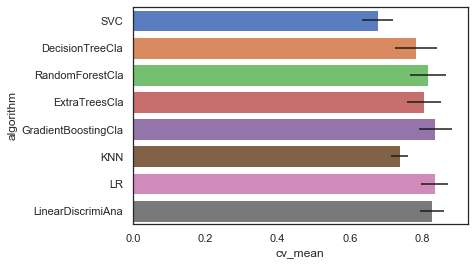

In [221]:
sns.barplot(data=cvResDf,x='cv_mean',y='algorithm',**{'xerr':cv_std})

## 模型调优
综合以上模型表现，考虑选择GradientBoostingCla、LR两种模型进一步对比。
分别建立GradientBoostingClassifier以及LogisticRegression模型，并进行模型调优

In [222]:
'''
挑选两个模型，也就是分类效果最好的两个，对他们的参数进行优化
'''
#GradientBoostingClassifier模型
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
modelgsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsGBC.fit(experData_X,experData_y)

#LogisticRegression模型
modelLR=LogisticRegression()
LR_param_grid = {'C' : [1,2,3],
                'penalty':['l1','l2']}
modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLR.fit(experData_X,experData_y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   11.3s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [223]:
#modelgsGBC模型
print('modelgsGBC模型得分为：%.3f'%modelgsGBC.best_score_)
#modelgsLR模型
print('modelgsLR模型得分为：%.3f'%modelgsLR.best_score_)


modelgsGBC模型得分为：0.843
modelgsLR模型得分为：0.834


<Figure size 432x288 with 0 Axes>

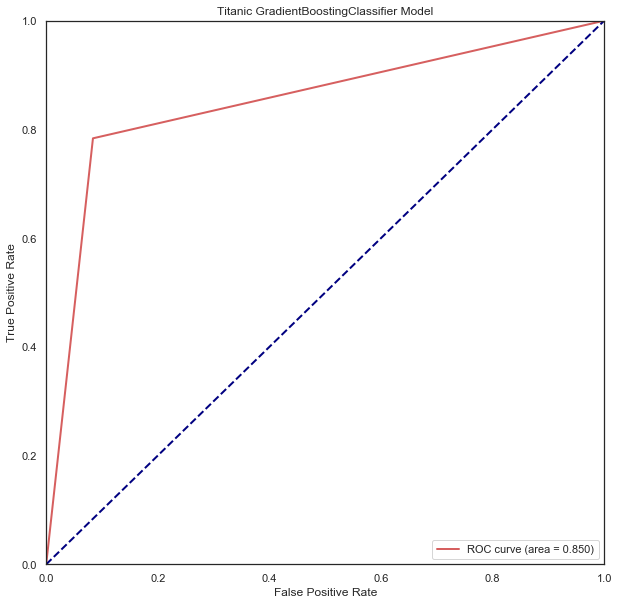

In [224]:
#查看模型ROC曲线
#求出测试数据模型的预测值
modelgsGBCtestpre_y=modelgsGBC.predict(experData_X).astype(int)
#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(experData_y, modelgsGBCtestpre_y) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBoostingClassifier Model')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

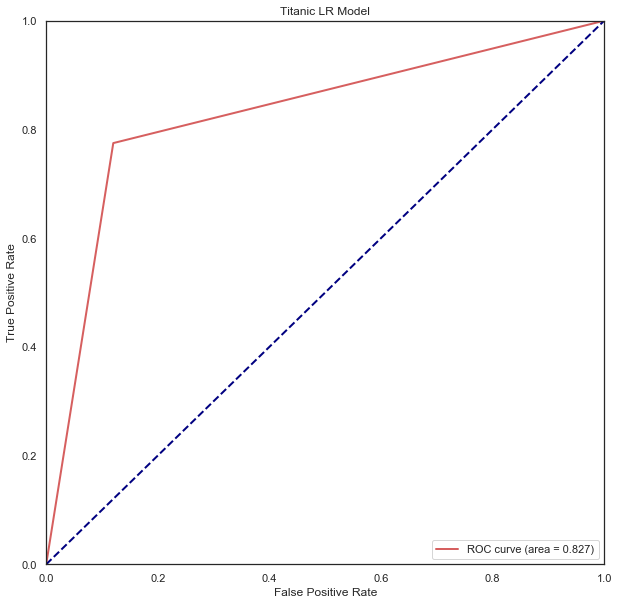

In [226]:
#查看模型ROC曲线
#求出测试数据模型的预测值
modelgsLRtestpre_y=modelgsLR.predict(experData_X).astype(int)
#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(experData_y, modelgsLRtestpre_y) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic LR Model')
plt.legend(loc="lower right")
plt.show()

In [229]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
print('GradientBoostingClassifier模型混淆矩阵为\n',confusion_matrix(experData_y.astype(int).astype(str),modelgsGBCtestpre_y.astype(str)))
print('LinearRegression模型混淆矩阵为\n',confusion_matrix(experData_y.astype(int).astype(str),modelgsLRtestpre_y.astype(str)))


GradientBoostingClassifier模型混淆矩阵为
 [[503  46]
 [ 74 268]]
LinearRegression模型混淆矩阵为
 [[483  66]
 [ 77 265]]


In [231]:
#TitanicGBSmodle
GBCpreData_y=modelgsGBC.predict(preData_X)
GBCpreData_y=GBCpreData_y.astype(int)
#导出预测结果
GBCpreResultDf=pd.DataFrame()
GBCpreResultDf['PassengerId']=full['PassengerId'][full['Survived'].isnull()]
GBCpreResultDf['Survived']=GBCpreData_y
GBCpreResultDf
#将预测结果导出为csv文件
GBCpreResultDf.to_csv('./TitanicGBSmodle.csv',index=False)